In [204]:
# independent variable (data, X) : bill_length_mm, bill_depth_mm, flipper_length_mm, 
#                                  body_mass_g
# dependent variable (target, y): species

# AdaBoostClassifier
# - estimator 
# - SGDClassifier, n_estimators=100

# bill_length_mm 군집화 3개 (K-Means) : species를 제대로 나누고 있는지 homogeniety_score 확인

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import metrics


data = sns.load_dataset('penguins')
data.dropna(inplace=True)
print(data)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0    Adelie  Torgersen            39.1           18.7              181.0  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [206]:
X = data.iloc[:,2:6]

# scaler = MinMaxScaler()
# X = scaler.fit(X).transform(X)

print(X)

y = data.iloc[:, 0]

enc = LabelEncoder()
y = enc.fit(y).transform(y)

print(y)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[333 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

In [207]:
# AdaBoostClassifier
# - estimator 
# - SGDClassifier, n_estimators=100

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m = AdaBoostClassifier()
m.fit(X_train, y_train)

print("Estimator : None | (Default : DecisionTreeClassifier(max_depth=1))")
print(m.estimator_)
print("train score ", m.score(X_train, y_train))
print("test score ", m.score(X_test, y_test))


m = AdaBoostClassifier(SGDClassifier(max_iter=90),n_estimators=100,algorithm='SAMME')
m.fit(X_train, y_train)

print("Estimator : SGDClassifier, n_estimators= 100")
print(m.estimator_)
print("train score ", m.score(X_train, y_train))
print("test score ", m.score(X_test, y_test))

Estimator : None | (Default : DecisionTreeClassifier(max_depth=1))
DecisionTreeClassifier(max_depth=1)
train score  0.8112449799196787
test score  0.7738095238095238


ValueError: BaseClassifier in AdaBoostClassifier ensemble is worse than random, ensemble can not be fit.

[0 0 0 0 0 0 2 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0
 0 2 0 2 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 0
 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 2 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 2 0
 2 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 1 2 1 1 2 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1 1 2 1 1 2 1 1 1 1 2 1 2 1 0 1 2 2 1 2
 2 1 1 1 2 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 1 1]
0.39279307452465306


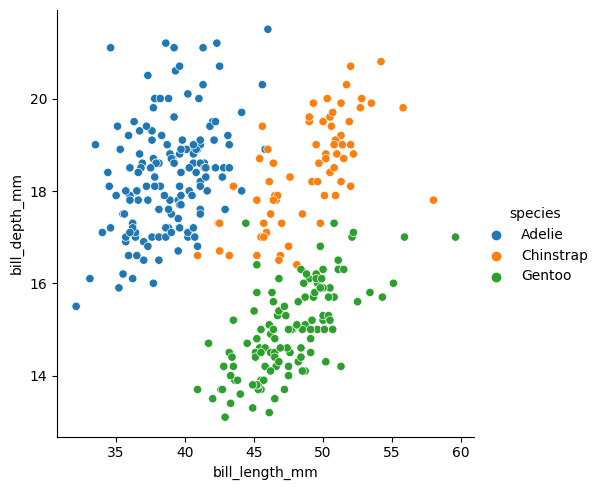

In [ ]:
# K-Means
m = KMeans(n_clusters=3, n_init="auto")

m.fit(X)

print(m.labels_)

print(metrics.homogeneity_score(y, m.labels_))

sns.relplot(data=data, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [ ]:
data = sns.load_dataset('penguins')
data.dropna(inplace=True)
print(data)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0    Adelie  Torgersen            39.1           18.7              181.0  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [ ]:
X = data.iloc[:, 2:6]
y = data['species']

le = LabelEncoder().fit(y)
y = le.transform(y)
print(y)

ss = StandardScaler().fit(X)
X = ss.transform(X)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[-0.89604189  0.7807321  -1.42675157 -0.56847478]
 [-0.82278787  0.11958397 -1.06947358 -0.50628618]
 [-0.67627982  0.42472926 -0.42637319 -1.1903608 ]
 ...
 [ 1.17338426 -0.74499437  1.50292796  1.91906927]
 [ 0.22108196 -1.20271231  0.78837197  1.23499466]
 [ 1.08181673 -0.54156417  0.85982757  1.48374906]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m1 = AdaBoostClassifier()
m1.fit(X_train, y_train)

print("Train ", m1.score(X_train, y_train))
print("Test ", m1.score(X_test, y_test))

Train  0.8112449799196787
Test  0.7738095238095238


In [ ]:
m2 = AdaBoostClassifier(estimator=SGDClassifier(max_iter=100),n_estimators=100,algorithm='SAMME')
m2.fit(X_train, y_train)

print("Train ", m2.score(X_train, y_train))
print("Test ", m2.score(X_test, y_test))

Train  1.0
Test  0.9880952380952381


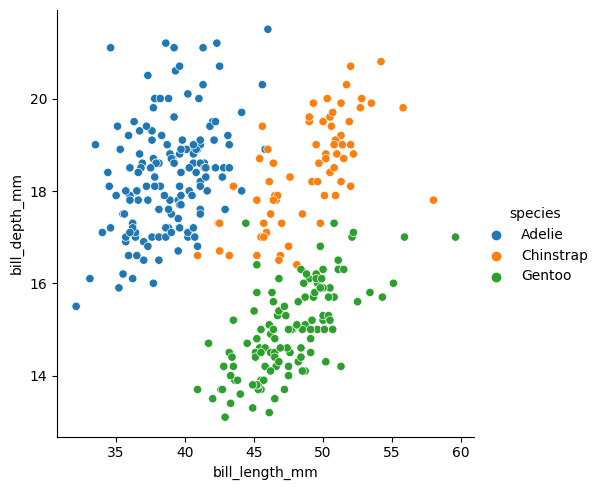

In [ ]:
sns.relplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species')

In [ ]:
cluster_m = KMeans(n_clusters=3, n_init='auto').fit(X[:, :2])
pred = cluster_m.labels_

print(pred)
print(metrics.homogeneity_score(y, pred))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 2 1 2 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 2 1 0 1 1 1 1 0 0 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.7382437322810194


In [ ]:
cluster_s = SpectralClustering().fit(X[:, :2])

pred_s = cluster_s.labels_

print(pred_s)
print(metrics.homogeneity_score(y, pred_s))

[0 0 0 0 3 0 0 0 3 3 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 3 3 0 0 0 0 0
 0 5 6 0 0 0 3 0 0 6 0 6 0 0 0 6 0 6 3 6 0 6 0 6 0 6 0 0 0 0 5 6 0 0 0 6 0
 6 0 0 0 0 3 0 0 0 0 0 0 6 0 6 0 0 0 6 0 6 3 6 3 0 0 0 3 6 0 6 3 0 0 3 0 0
 3 6 0 6 0 0 0 6 0 0 0 0 5 0 0 0 0 0 0 6 3 6 0 0 0 6 0 6 0 0 0 0 0 6 0 5 4
 4 5 4 5 5 5 5 4 5 4 5 5 5 4 4 2 5 5 0 5 5 4 5 4 5 5 5 4 0 4 0 5 5 5 5 4 5
 4 4 5 4 5 5 5 5 4 5 5 7 4 5 4 0 4 5 4 5 5 4 5 5 4 0 5 4 5 1 7 7 7 7 1 1 7
 1 7 1 7 1 7 1 7 1 7 1 7 7 1 1 7 1 7 7 7 7 7 1 1 2 7 7 1 5 1 7 1 7 1 7 7 1
 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 5 7 1 7 7 7 7 7 7 7 7 7 1 5 7 7 7 7
 1 5 1 7 1 5 7 5 1 7 1 7 7 7 7 7 7 2 7 7 7 1 7 1 7 7 7 1 7 1 7 7 1 1 7 1 7]
0.8409015089383363
